Load up cleaned data set and ensure all previous steps are accounted for. 

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Data/airline_delay_cleaned.csv")
print(df.head())
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         89.0       13.0   
1             Albany, GA: Southwest Georgia Regional         62.0       10.0   
2           Alexandria, LA: Alexandria International         62.0       10.0   
3        Augusta, GA: Augusta Regional at Bush Field         66.0       12.0   
4                   Albany, NY: Albany International         92.0       22.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60  ...          0.0              5.99            2.0   
1        1.97        0.04  ...          

In [ ]:
#General statistics of each row. 
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551194,6.492860,362.528467,66.355716,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890212,3.440977,992.894662,179.448903,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


The format I followed for this EDA was to create and organize the data into visuals that could easily describe certain patterns found within the data set
this informaiton pokes holes in and uncovers trends to do with seasonality, carriers, and airports. This is a critcal step in uncovering the features
we need to be taking a look at in our future steps of the process in order to create the best model we can. 

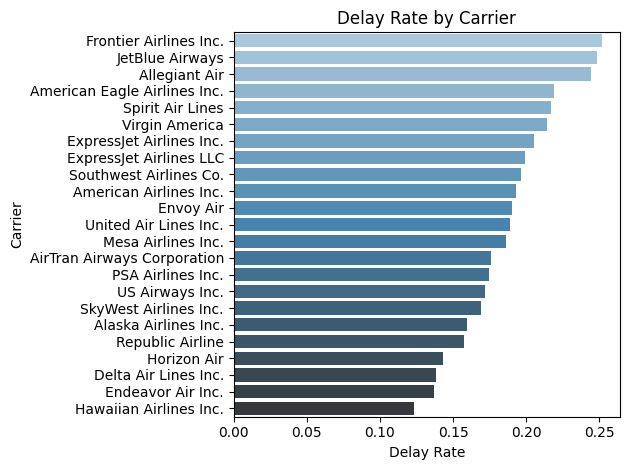

In [19]:
carrier_summary = df.groupby('carrier_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_cancelled': 'sum',
    'arr_delay': 'sum'
}).reset_index()

# Calculate rates
carrier_summary['delay_rate'] = carrier_summary['arr_del15'] / carrier_summary['arr_flights']
carrier_summary['cancel_rate'] = carrier_summary['arr_cancelled'] / carrier_summary['arr_flights']

# Barplot: Delay rate by carrier
sns.barplot(data=carrier_summary.sort_values('delay_rate', ascending=False),
            x='delay_rate', y='carrier_name', hue='carrier_name',legend=False, palette='Blues_d')
plt.title("Delay Rate by Carrier")
plt.xlabel("Delay Rate")
plt.ylabel("Carrier")
plt.tight_layout()
plt.show()

### Delay Rate by Carrier

This horizontal bar chart shows the **average delay rate** for each airline, calculated as the proportion of flights delayed more than 15 minutes out of total flights.

#### Key Insights:
- **Frontier Airlines**, **JetBlue**, and **Allegiant Air** have the highest delay rates, each exceeding **22%** of flights delayed.
- **American Eagle** and **Spirit Airlines** also perform poorly in terms of punctuality.
- **Delta Air Lines**, **Endeavor Air**, and **Hawaiian Airlines** rank among the best performers, with delay rates closer to **10–13%**.
- Legacy carriers like **United**, **American**, and **Southwest** fall somewhere in the middle, showing consistent but not exemplary performance.
- The differences highlight variability in operational reliability between low-cost and full-service airlines, with regional affiliates showing a wide range of outcomes.

This chart offers a **normalized performance comparison** by removing volume bias, making it ideal for benchmarking carrier reliability regardless of size.


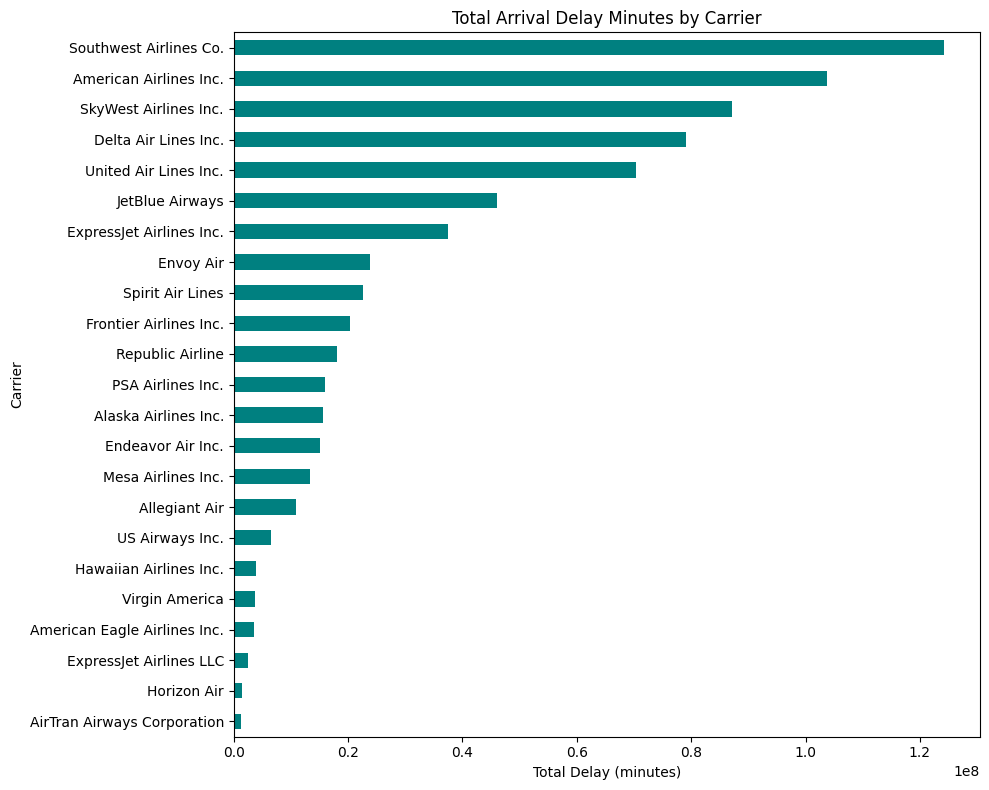

In [20]:
# Total delays
carrier_total_delay = df.groupby('carrier_name')['arr_delay'].sum().sort_values(ascending=False)

carrier_total_delay.plot(kind='barh', figsize=(10, 8), color='teal')
plt.title('Total Arrival Delay Minutes by Carrier')
plt.xlabel('Total Delay (minutes)')
plt.ylabel('Carrier')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

### Total Arrival Delay Minutes by Carrier

This bar chart shows the total number of arrival delay minutes accumulated by each carrier over the reporting period.

#### Key Insights:
- **Southwest Airlines** and **American Airlines** account for the largest total delay time, each surpassing **100 million minutes**. This is due not only to delay frequency but also to the **sheer volume of flights** operated.
- **SkyWest**, **Delta**, and **United** round out the top five, reflecting both scale and moderate delay profiles.
- Low-cost carriers like **JetBlue** and **Spirit** have lower total delay time compared to the largest carriers but still show notable values.
- Some carriers with high **delay rates** (e.g., **Frontier**, **Allegiant**) have relatively low **total delay minutes** highlighting the importance of comparing both rate and volume when assessing performance.
- Regional and low-volume carriers (e.g., **AirTran**, **ExpressJet LLC**) naturally show the lowest totals due to fewer operations.

This chart emphasizes **scale-driven delay impact**, which complements the **delay rate** chart by showing which carriers contribute the most to **overall system congestion**.


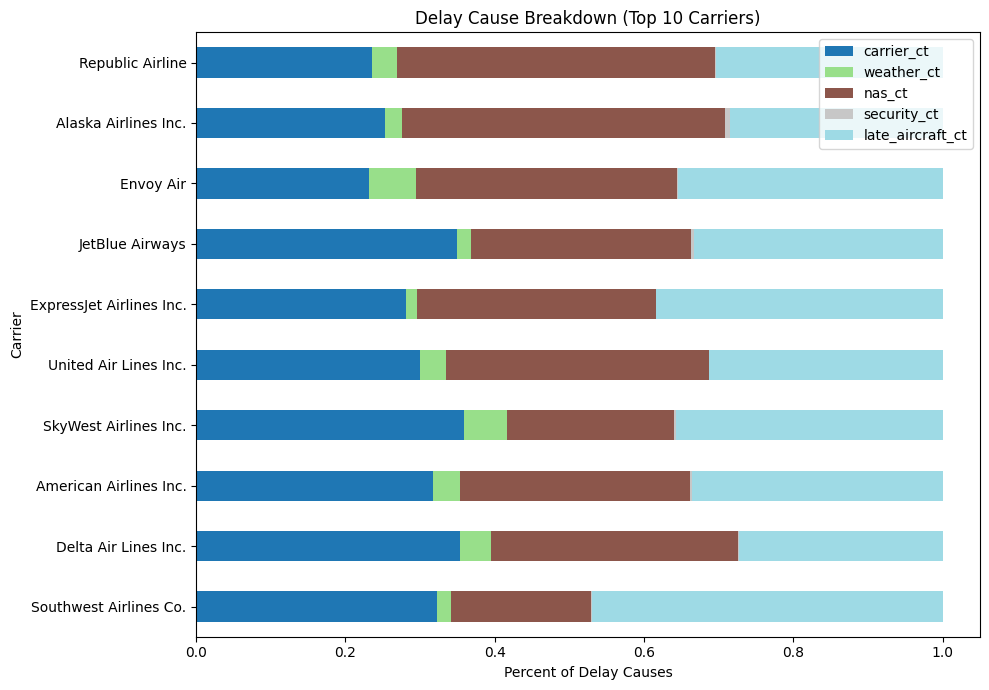

In [21]:
# Sum of all causes per carrier
cause_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
carrier_causes = df.groupby('carrier_name')[cause_cols].sum()

# Normalize to percent of delays per carrier
carrier_causes_percent = carrier_causes.div(carrier_causes.sum(axis=1), axis=0)

# Plot stacked bar chart for top 10 carriers by flights
top10 = df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False).head(10).index
carrier_causes_percent.loc[top10].plot(kind='barh', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Delay Cause Breakdown (Top 10 Carriers)')
plt.xlabel('Percent of Delay Causes')
plt.ylabel('Carrier')
plt.tight_layout()
plt.show()

### Delay Cause Breakdown (Top 10 Carriers)

This stacked bar chart shows the **proportional contribution** of each delay cause for the top 10 carriers by total arrivals.

Each delay is classified into one of five FAA-defined categories:
- **Carrier**: Airline-specific operations or maintenance
- **Weather**: Extreme or non-extreme conditions
- **NAS**: National Airspace System issues (air traffic control)
- **Security**: Delays due to security screening or threats
- **Late Aircraft**: Delays caused by a prior late-arriving flight

#### Key Insights:
- **Late aircraft** is a dominant source of delays for nearly all carriers - particularly **Southwest**, **Delta**, and **United**.
- **JetBlue** and **Delta** have significant portions attributed to **carrier-specific causes**, suggesting internal operational bottlenecks.
- **NAS-related delays** (ATC congestion) are a major contributor across nearly all carriers, especially **Republic** and **Alaska Airlines**.
- **Security delays** contribute minimally, which is expected.
- **Weather delays**, though present, remain a relatively smaller share of total delays across the board.

This breakdown highlights how **different carriers are impacted by different systemic and operational issues**, making it useful for diagnosing performance drivers and targeting areas for improvement.


In [22]:
airport_summary = df.groupby('airport_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_cancelled': 'sum',
    'arr_delay': 'sum'
}).reset_index()

# Add rates
airport_summary['delay_rate'] = airport_summary['arr_del15'] / airport_summary['arr_flights']
airport_summary['cancel_rate'] = airport_summary['arr_cancelled'] / airport_summary['arr_flights']

# Preview
airport_summary.sort_values('arr_flights', ascending=False).head()

,airport_name,arr_flights,arr_del15,arr_cancelled,arr_delay,delay_rate,cancel_rate
19,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3557460.0,508434.0,45104.0,34955219.0,0.142921,0.012679
69,"Chicago, IL: Chicago O'Hare International",2774102.0,535940.0,80821.0,40507725.0,0.193194,0.029134
90,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2588687.0,481259.0,70542.0,36402812.0,0.185909,0.027250
96,"Denver, CO: Denver International",2391883.0,433104.0,46749.0,28006416.0,0.181072,0.019545
218,"Los Angeles, CA: Los Angeles International",2017064.0,397496.0,28294.0,23410344.0,0.197067,0.014027


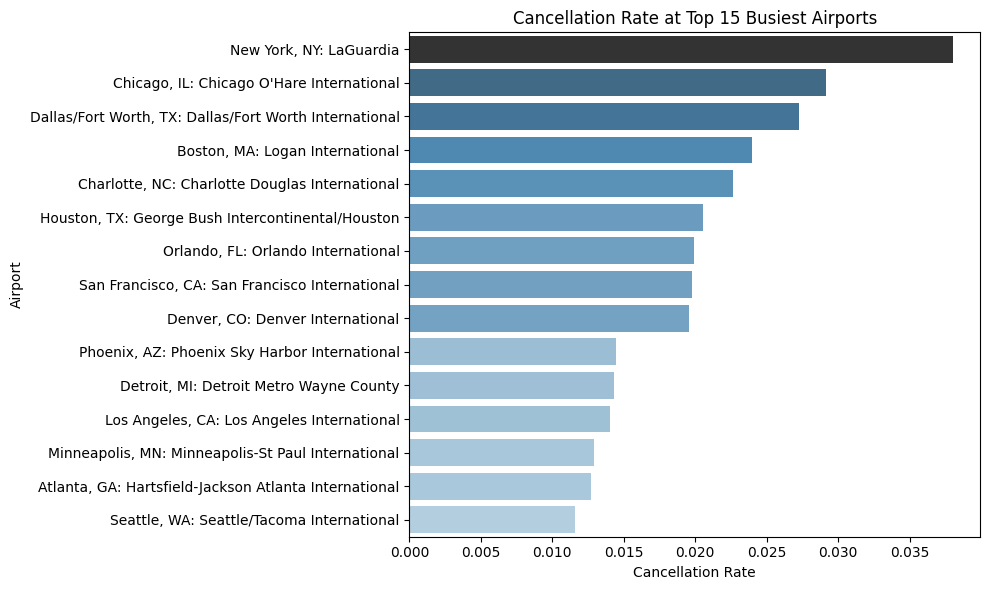

In [54]:
# Select top 15 busiest airports
top15_airports = airport_summary.sort_values('arr_flights', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top15_airports.sort_values('cancel_rate', ascending=False),
        x='cancel_rate', y='airport_name', hue ='cancel_rate', legend=False, palette='Blues_d')
plt.title("Cancellation Rate at Top 15 Busiest Airports")
plt.xlabel("Cancellation Rate")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()

### Cancellation Rate at Top 15 Busiest Airports

This bar chart compares cancellation rates for the 15 busiest airports in the U.S., revealing notable variability in how reliably these hubs handle scheduled traffic.

#### Key Insights:
- **New York LaGuardia (LGA)** stands out with the **highest cancellation rate**, approaching 4%. This is likely due to congestion, weather vulnerability, and constrained runway space.
- **Chicago O’Hare (ORD)** and **Dallas/Fort Worth (DFW)** also exhibit elevated cancellation rates despite being major international hubs.
- Conversely, **Atlanta (ATL)** — the busiest airport in the U.S. by flight volume — maintains one of the **lowest cancellation rates**, reflecting highly efficient operational practices.
- Other high-traffic airports such as **Los Angeles (LAX)**, **Seattle (SEA)**, and **Phoenix (PHX)** also perform relatively well with cancellation rates under 1.5%.

This chart reinforces the idea that **volume does not necessarily predict unreliability**, and highlights operational efficiency differences across major hubs.


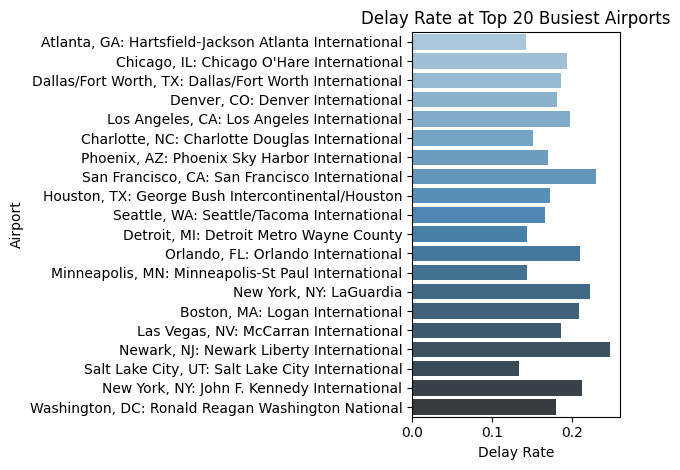

In [28]:
top20_airports = airport_summary.sort_values('arr_flights', ascending=False).head(20)

sns.barplot(data=top20_airports, x='delay_rate', y='airport_name',hue='airport_name',legend=False, palette='Blues_d')
plt.title("Delay Rate at Top 20 Busiest Airports")
plt.xlabel("Delay Rate")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()

### Delay Rate at Top 20 Busiest Airports

This bar chart shows the proportion of delayed arrivals at the 20 busiest U.S. airports, offering a normalized view of operational reliability across major hubs.

#### Key Takeaways:
- **San Francisco International (SFO)** and **Newark Liberty (EWR)** exhibit some of the **highest delay rates**, likely due to frequent fog (SFO), congestion, and airspace complexity.
- **Atlanta (ATL)**, despite being the most trafficked airport in the country, maintains the **lowest delay rate**, highlighting exceptional throughput efficiency.
- Other well-performing airports include **Detroit (DTW)**, **Charlotte (CLT)**, and **Minneapolis (MSP)**.
- **New York-area airports** LaGuardia (LGA), JFK, and Newark (EWR) all fall toward the higher end of the delay rate scale, underscoring congestion challenges in the region.

This chart complements the cancellation analysis by showing **how often flights run behind schedule** (even when not cancelled) and points to **systemic congestion patterns** in specific urban airspace zones.


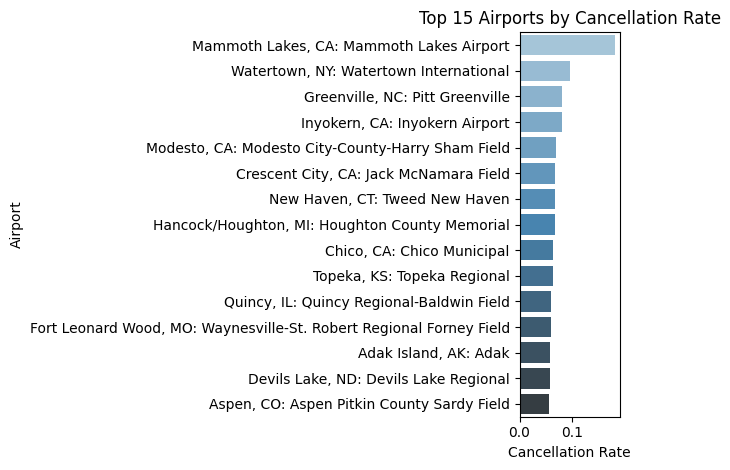

In [29]:
top_cancel_airports = airport_summary.sort_values('cancel_rate', ascending=False).head(15)

sns.barplot(data=top_cancel_airports, x='cancel_rate', y='airport_name',hue='airport_name',legend=False, palette='Blues_d')
plt.title("Top 15 Airports by Cancellation Rate")
plt.xlabel("Cancellation Rate")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()

### Top 15 Airports by Cancellation Rate

This bar chart highlights the 15 airports with the **highest cancellation rates** in the dataset, regardless of traffic volume.

#### Key Insights:
- Small regional airports like **Mammoth Lakes (CA)**, **Watertown (NY)**, and **Greenville (NC)** top the list, with cancellation rates exceeding **10%**.
- Many of these airports serve **remote or seasonal regions**, where flights are more prone to cancellation due to weather, staffing constraints, or low demand.
- Unlike major hubs, these facilities may **lack redundancy in carriers or runways**, making them more vulnerable to disruption.
- Notably, **Adak Island (AK)** and **Devils Lake (ND)** appear among the highest reinforcing the unique challenges of serving low-density or hard-to-reach destinations.

This plot adds nuance by spotlighting **high-risk nodes** in the national air travel system that might otherwise be overlooked in volume-based analyses.


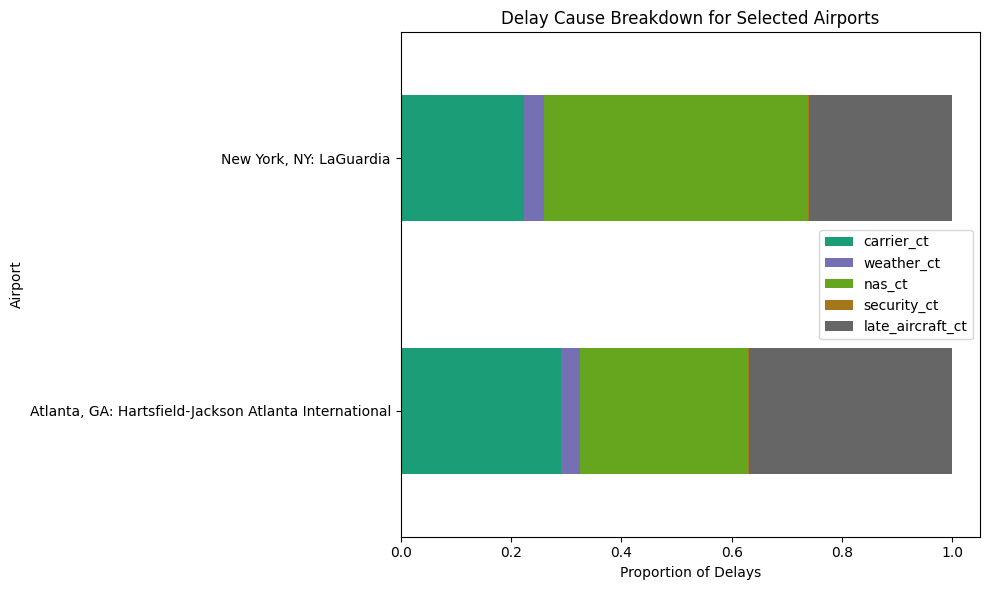

In [30]:
selected_airports = ['Atlanta, GA: Hartsfield-Jackson Atlanta International',
                     'Chicago, IL: O\'Hare International',
                     'New York, NY: LaGuardia']

# Aggregate delay causes by airport
cause_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
airport_causes = df[df['airport_name'].isin(selected_airports)].groupby('airport_name')[cause_cols].sum()

# Normalize
airport_causes_percent = airport_causes.div(airport_causes.sum(axis=1), axis=0)

airport_causes_percent.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Dark2')
plt.title("Delay Cause Breakdown for Selected Airports")
plt.xlabel("Proportion of Delays")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()

### Delay Cause Breakdown: LaGuardia vs. Atlanta

This stacked bar chart compares the **proportional causes of arrival delays** at two key airports:
- **LaGuardia (LGA)** one of the most delay-prone
- **Atlanta (ATL)** the nation's busiest airport, yet relatively efficient

#### Key Observations:
- **LaGuardia's delays are dominated by NAS (National Airspace System) constraints**, likely due to **air traffic congestion** and limited runway space in the New York metro area.
- ATL also sees a high proportion of NAS-related delays but with a **larger share of carrier-related delays**, suggesting internal operations have more influence than airspace at ATL.
- Both airports show a **significant share of delays caused by late-arriving aircraft**, which is common at high-volume hubs.
- Weather and security delays remain **consistently minor contributors** at both airports.

This breakdown highlights how **context matters** even when total delay minutes are comparable, the **underlying operational challenges** can differ drastically between airports.


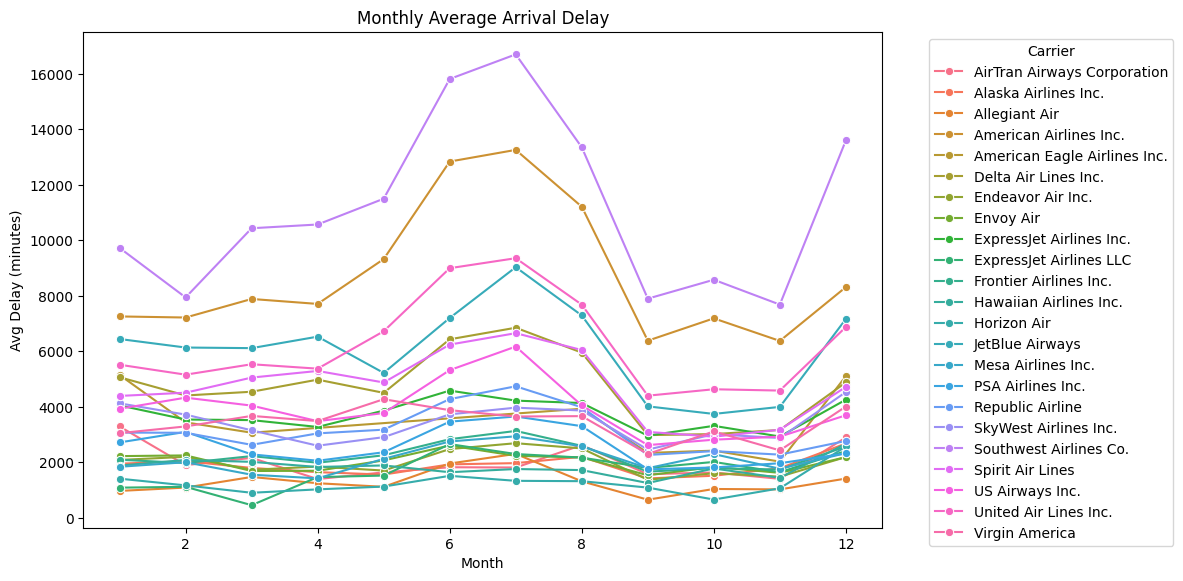

In [47]:

top_carriers = df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False).index

# Group by month and carrier to get average delay
monthly_carrier = df.groupby(['month', 'carrier_name'])['arr_delay'].mean().reset_index()

# Filter to top carriers only
filtered_carriers = monthly_carrier[monthly_carrier['carrier_name'].isin(top_carriers)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_carriers, x='month', y='arr_delay', hue='carrier_name', marker='o')
plt.title("Monthly Average Arrival Delay")
plt.xlabel("Month")
plt.ylabel("Avg Delay (minutes)")
plt.legend(title="Carrier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Monthly Delay Trends by Top 10 Carriers

This line plot shows average arrival delays per month for the 10 most active airlines by total flight volume.

Key findings:
- **Southwest Airlines** and **American Airlines** consistently report the highest delay volumes, with clear summer spikes in **June and July**.
- **JetBlue** and **Delta** show moderate delays and seasonal variation.
- Delays across most carriers drop notably in **September**, possibly due to lower travel demand post-summer.
- This visualization helps compare operational performance and delay volatility across major carriers.


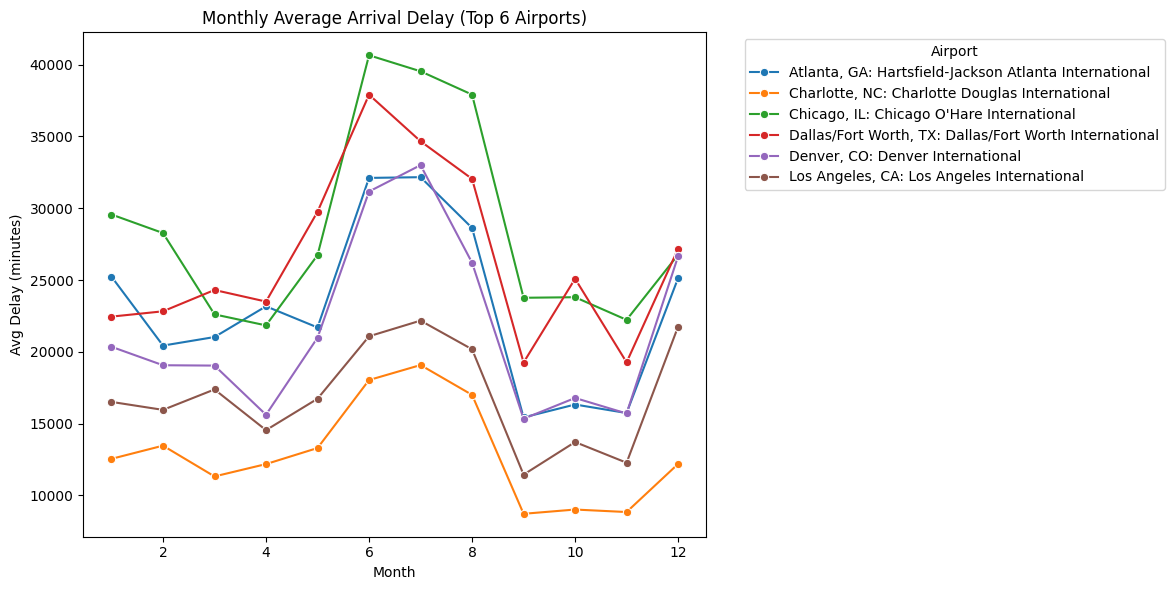

In [ ]:

top_airports = df.groupby('airport_name')['arr_flights'].sum().sort_values(ascending=False).head(6).index


monthly_airport = df.groupby(['month', 'airport_name'])['arr_delay'].mean().reset_index()
filtered = monthly_airport[monthly_airport['airport_name'].isin(top_airports)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x='month', y='arr_delay', hue='airport_name', marker='o')
plt.title("Monthly Average Arrival Delay (Top 6 Airports)")
plt.xlabel("Month")
plt.ylabel("Avg Delay (minutes)")
plt.legend(title="Airport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Monthly Average Arrival Delay (Top 6 Airports)

This line plot shows the monthly average arrival delay (in minutes) for the six busiest airports by total flight volume.

Key observations:
- **Chicago O’Hare (ORD)** and **Dallas/Fort Worth (DFW)** consistently show the highest delay volumes, peaking in **June and July**.
- **Denver (DEN)** and **Atlanta (ATL)** also experience similar seasonal peaks but at slightly lower magnitudes.
- **Charlotte (CLT)** and **Los Angeles (LAX)** exhibit more moderate delays year-round.
- A pronounced dip is visible across most airports during **September and October**, possibly reflecting lower seasonal travel.

By focusing on the busiest hubs, this plot highlights **both performance trends and operational pressure points** across the U.S. airspace system.


## Final Summary

### Data Structure
- Data represents **monthly summaries** per airline-airport combination.
- Variables include flight counts, cancellations, 15+ minute delays, total delay minutes, and breakdowns by cause (carrier, weather, NAS, security, late aircraft).

### Key Findings

#### 1. **Carrier Performance**
- **Southwest**, **American**, and **Delta** account for the highest **total delay minutes**, primarily due to high volume.
- **Frontier**, **JetBlue**, and **Allegiant** lead in **delay rate**, meaning a higher proportion of their flights are late.
- **Cancellation rates** are lowest for full-service carriers like Delta and highest among regional and ultra-low-cost carriers.
- **Delay cause breakdowns** reveal that:
  - **Late aircraft** and **carrier-related issues** are dominant across most airlines.
  - NAS delays are also significant but more consistent across carriers.

#### 2. **Airport Performance**
- **ATL (Atlanta)** is a standout: despite being the busiest, it has among the **lowest delay and cancellation rates**.
- **LGA (LaGuardia)**, **ORD (Chicago O’Hare)**, and **EWR (Newark)** show high cancellation and delay rates, often due to **airspace congestion**.
- Smaller regional airports (e.g., **Mammoth Lakes**, **Watertown NY**) top the list in **cancellation rates**, likely due to seasonal volatility and limited service.

#### 3. **Temporal Patterns**
- **Summer months (June–August)** show clear peaks in both delay minutes and delay rates across most airports and carriers.
- **September and October** tend to show notable drops, likely due to reduced travel demand post-summer.

### Operational Insights

- High volume does **not necessarily mean high unreliability**. ATL outperforms many smaller airports despite handling significantly more flights.
- **Delay causes vary by location**: LGA is dominated by NAS delays, while ATL sees more internally-driven carrier delays.
- Smaller regional airports may **amplify cancellation risk** for passengers, despite low absolute flight counts.

